In [94]:
import numpy as np
import astropy.io.fits as pyf
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import product
from tqdm import tqdm
import time
import h5py

plt.style.use("dark_mode")

def hd5_open(file_name):
    f=h5py.File(file_name,'r', swmr=True)
    data = f['data'][:]
    f.close()
    return data

# NPCF Coefficient Computation

In this notebook we will compute all the necessary coefficients needed for our classification analysis. We will start with the projected 3PCF and then move onto the projected 4PCF.

One can almost think of this as a similar process to a Convolutional Neural Network. Essentially we are taking an image slice of $256 \times 256$ and we are reducing the dimensionality down to $N_{\rm bins} \times N_{\rm bins}$ in our NPCF calculation. This in principal should contain most of the useful information needed to classify simulations while reducing the dimensionality of our dataset for classification. We will begin with non NN based classifiers for now.


In [98]:
#Mach Number and Alfvénic Mach Number

M_s, M_A = 0.7, 0.7

#Format Directory String
if M_s == 0.7:
    M_s_str = '0p7'
elif M_s == 2.0:
    M_s_str = '2p0'
else:
    M_s_str = None

if M_A == 0.7:
    M_A_str = '0p7'
elif M_A == 2.0:
    M_A_str = '2p0'
else:
    M_A_str = None

save_dir = f'Ms_{M_s_str}__Ma_{M_A_str}'

save_dir

'Ms_0p7__Ma_0p7'

In [6]:
def compile_data():
    """
    A function to compile all the data for each parameter set
    """
    
    all_data = {}
    
        
    for i in range(500, 901, 50):
        save_name = f'/dens_t{i}'
        file = save_dir + save_name+'.fits.gz'
        hdulist = pyf.open(file)
        data = hdulist[0].data.astype(np.float64)
        data = (data - np.mean(data))/np.std(data)
        
        all_data[f't_{i}'] = data
        
    return all_data


MHD_data = compile_data()

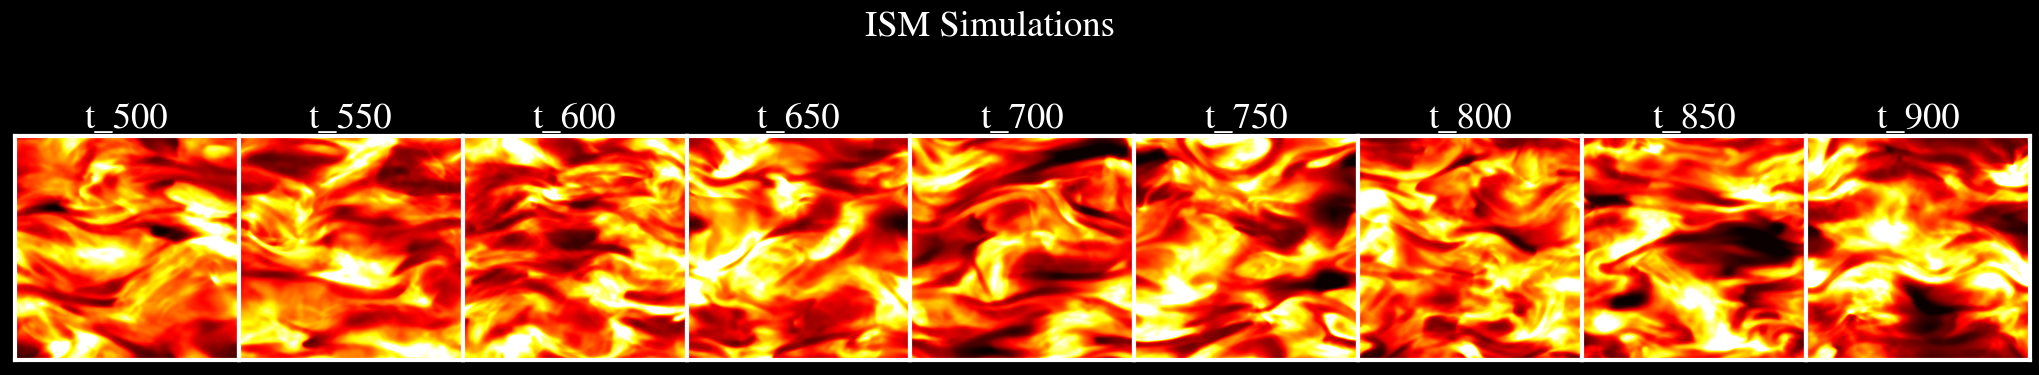

In [119]:
f, axes = plt.subplots(1,9,figsize=(26,5), gridspec_kw={'hspace':-0.2, 'wspace':0.00})

f.suptitle("ISM Simulations")

img_slice = 128
cmap_ = 'hot'
vmin, vmax = -2,2

for i, data in enumerate(MHD_data):
    data_slice = MHD_data[data][img_slice,:,:]
    # data_slice = np.mean(MHD_data[data], axis=0)
    axes[i].set_xticklabels([]), axes[i].set_yticklabels([])
    axes[i].set_xticks([]), axes[i].set_yticks([])
    axes[i].set_title(data)
    axes[i].imshow(data_slice, cmap=cmap_, origin='lower', vmin=vmin, vmax=vmax)


plt.show()

In [ ]:
import sarabande
sarabande.check_install()

## Projected 3PCF

In [67]:
nbins = 10
m_max = 10
rmax = 128

proj_3PCF_coefficients = []

for i in tqdm(range(len(MHD_data))):
    for slice_ in range(0,256, 8):
        t = 500 + 50*i
        density_field = MHD_data[f"t_{t}"][slice_,:,:]
        proj_3pcf = sarabande.measure(nPCF=3, projected=True, m_max=m_max, density_field_data=density_field, 
                                  nbins=nbins, physical_boxsize=256, rmin=1, rmax=rmax, normalize=True, save_name='test', save_dir='')

        sarabande.calc_zeta(proj_3pcf,verbose_flag=False)
        proj_3PCF_coefficients.append(proj_3pcf.zeta)
    
    

  0%|                                                                                         | 0/9 [00:00<?, ?it/s]

Preparing the data:

Finished Calculating the Projected 3PCF in 0.3539 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3360 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3285 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3309 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3311 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3292 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3286 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3294 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3310 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3464 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3434 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3337 seconds
Preparing the data:

Finished Calculating the Projec

 11%|█████████                                                                        | 1/9 [00:10<01:26, 10.84s/it]


Finished Calculating the Projected 3PCF in 0.3298 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3360 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3358 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3300 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3302 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3359 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3300 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3388 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3505 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3543 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3518 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3530 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3511 s

 22%|██████████████████                                                               | 2/9 [00:21<01:16, 10.92s/it]


Finished Calculating the Projected 3PCF in 0.3337 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3304 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3380 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3315 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3362 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3344 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3319 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3302 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3336 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3377 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3332 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3547 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3505 s

 33%|███████████████████████████                                                      | 3/9 [00:32<01:05, 10.96s/it]


Finished Calculating the Projected 3PCF in 0.3542 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3447 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3360 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3460 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3453 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3459 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3539 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3523 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3328 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3288 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3299 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3347 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3288 s

 44%|████████████████████████████████████                                             | 4/9 [00:43<00:54, 10.86s/it]


Finished Calculating the Projected 3PCF in 0.3347 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3310 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3306 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3332 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3311 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3294 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3332 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3289 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3361 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3450 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3412 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3295 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3294 s

 56%|█████████████████████████████████████████████                                    | 5/9 [00:54<00:43, 10.78s/it]


Finished Calculating the Projected 3PCF in 0.3288 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3313 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3295 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3359 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3281 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3288 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3287 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3308 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3337 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3367 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3288 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3312 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3288 s

 67%|██████████████████████████████████████████████████████                           | 6/9 [01:04<00:32, 10.72s/it]


Finished Calculating the Projected 3PCF in 0.3284 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3339 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3318 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3333 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3286 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3310 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3318 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3283 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3329 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3338 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3293 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3289 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3351 s

 78%|███████████████████████████████████████████████████████████████                  | 7/9 [01:15<00:21, 10.69s/it]


Finished Calculating the Projected 3PCF in 0.3502 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3593 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3417 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3497 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3571 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3512 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3401 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3575 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3494 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3554 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3560 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3527 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3506 s

 89%|████████████████████████████████████████████████████████████████████████         | 8/9 [01:26<00:10, 10.86s/it]


Finished Calculating the Projected 3PCF in 0.3443 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3374 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3366 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3427 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3424 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3463 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3480 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3390 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3367 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3365 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3683 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3613 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.3453 s

100%|█████████████████████████████████████████████████████████████████████████████████| 9/9 [01:37<00:00, 10.86s/it]


Finished Calculating the Projected 3PCF in 0.3306 seconds


### Seperate the Real from the Imaginary

In [82]:
proj_3PCF_coefficients_real, proj_3PCF_coefficients_imag = [], []
for i in range(len(proj_3PCF_coefficients)):
    proj_3PCF_coefficients_real.append(proj_3PCF_coefficients[i].real)
    proj_3PCF_coefficients_imag.append(proj_3PCF_coefficients[i].imag)


In [93]:
hf = h5py.File(f'{save_dir}/Coefficients_3PCF_real.h5', 'w')
hf.create_dataset('data', data=proj_3PCF_coefficients_real)
hf.close()

In [102]:
data = hd5_open(f'{save_dir}/Coefficients_3PCF_real.h5')

## Projected 4PCF

In [125]:
nbins = 10
m_max = 10
rmax = 128

proj_4PCF_coefficients = []

for i in tqdm(range(len(MHD_data))):
    for slice_ in range(0,256, 128):
        t = 500 + 50*i
        density_field = MHD_data[f"t_{t}"][slice_,:,:]
        proj_4pcf = sarabande.measure(nPCF=4, projected=True, m_max=m_max, density_field_data=density_field, 
                                  nbins=nbins, physical_boxsize=256, rmin=1, rmax=rmax, normalize=True, save_name='test', save_dir='')

        sarabande.calc_zeta(proj_4pcf,verbose_flag=False)
        proj_4PCF_coefficients.append(proj_4pcf.zeta)

  0%|                                                                                         | 0/9 [00:00<?, ?it/s]

Preparing the data:

Finished Calculating the Projected 4PCF in 11.2144 seconds
Preparing the data:


 11%|█████████                                                                        | 1/9 [00:22<02:58, 22.36s/it]


Finished Calculating the Projected 4PCF in 11.1473 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 11.0615 seconds
Preparing the data:


 22%|██████████████████                                                               | 2/9 [00:44<02:35, 22.27s/it]


Finished Calculating the Projected 4PCF in 11.1454 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 11.1007 seconds
Preparing the data:


 33%|███████████████████████████                                                      | 3/9 [01:06<02:13, 22.28s/it]


Finished Calculating the Projected 4PCF in 11.1842 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 11.1867 seconds
Preparing the data:


 44%|████████████████████████████████████                                             | 4/9 [01:29<01:52, 22.52s/it]


Finished Calculating the Projected 4PCF in 11.6923 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 11.2742 seconds
Preparing the data:


 56%|█████████████████████████████████████████████                                    | 5/9 [01:52<01:30, 22.53s/it]


Finished Calculating the Projected 4PCF in 11.2864 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 11.2922 seconds
Preparing the data:


 67%|██████████████████████████████████████████████████████                           | 6/9 [02:14<01:07, 22.59s/it]


Finished Calculating the Projected 4PCF in 11.3951 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 11.4320 seconds
Preparing the data:


 78%|███████████████████████████████████████████████████████████████                  | 7/9 [02:37<00:45, 22.63s/it]


Finished Calculating the Projected 4PCF in 11.3010 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 11.3165 seconds
Preparing the data:


 89%|████████████████████████████████████████████████████████████████████████         | 8/9 [03:00<00:22, 22.65s/it]


Finished Calculating the Projected 4PCF in 11.3505 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 11.3566 seconds
Preparing the data:


100%|█████████████████████████████████████████████████████████████████████████████████| 9/9 [03:23<00:00, 22.56s/it]


Finished Calculating the Projected 4PCF in 11.3325 seconds
